In [2]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# PostgreSQL connection details
postgres_user = 'postgres'
postgres_password = ''
postgres_host = 'localhost'
postgres_port = '5432'
postgres_db = 'football'

# Create a PostgreSQL connection using SQLAlchemy
postgres_uri = f'postgresql://{postgres_user}:{postgres_password}@{postgres_host}:{postgres_port}/{postgres_db}'
engine = create_engine(postgres_uri)

# Define table name (adjust if necessary)
table_name = 'haaland_statistics'

# Read the table into a Pandas DataFrame
df = pd.read_sql_table(table_name, engine)

# Check the first few rows of the dataframe to ensure it's loaded correctly
print(df.head())
print(df.info())

   Unnamed: 0        Date            Squad       Opponent  Min  Gls  Ast  PK  \
0           0  2023-08-11  Manchester City        Burnley   79    2    0   0   
1           1  2023-08-19  Manchester City  Newcastle Utd   90    0    0   0   
2           2  2023-08-27  Manchester City  Sheffield Utd   90    1    0   0   
3           3  2023-09-02  Manchester City         Fulham   90    3    1   1   
4           4  2023-09-16  Manchester City       West Ham   89    1    0   0   

   PKatt  Sh  ...  GCA  PassCmp  PassAttm  PassCmp%  PrgPass  Carries  \
0      0   4  ...    0        9        11      81.8        1       15   
1      0   4  ...    0        6        11      54.5        1       15   
2      1   7  ...    1        6        11      54.5        0       15   
3      1   3  ...    1        4         6      66.7        1        9   
4      0   9  ...    0        9        13      69.2        0       17   

   PrgCarries  TakeonsAtt  TakeonsSucc  match_id  
0           1           0    

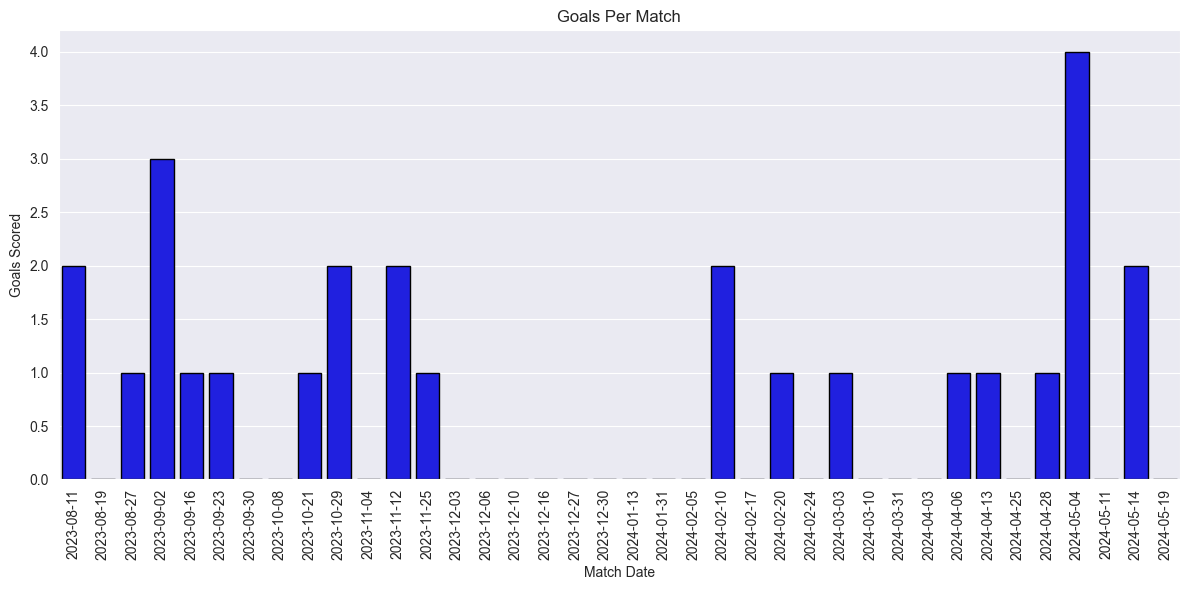

In [3]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Date', y='Gls', color='blue', edgecolor='black')
plt.xticks(rotation=90)
plt.title('Goals Per Match')
plt.xlabel('Match Date')
plt.ylabel('Goals Scored')
plt.tight_layout()
plt.show()


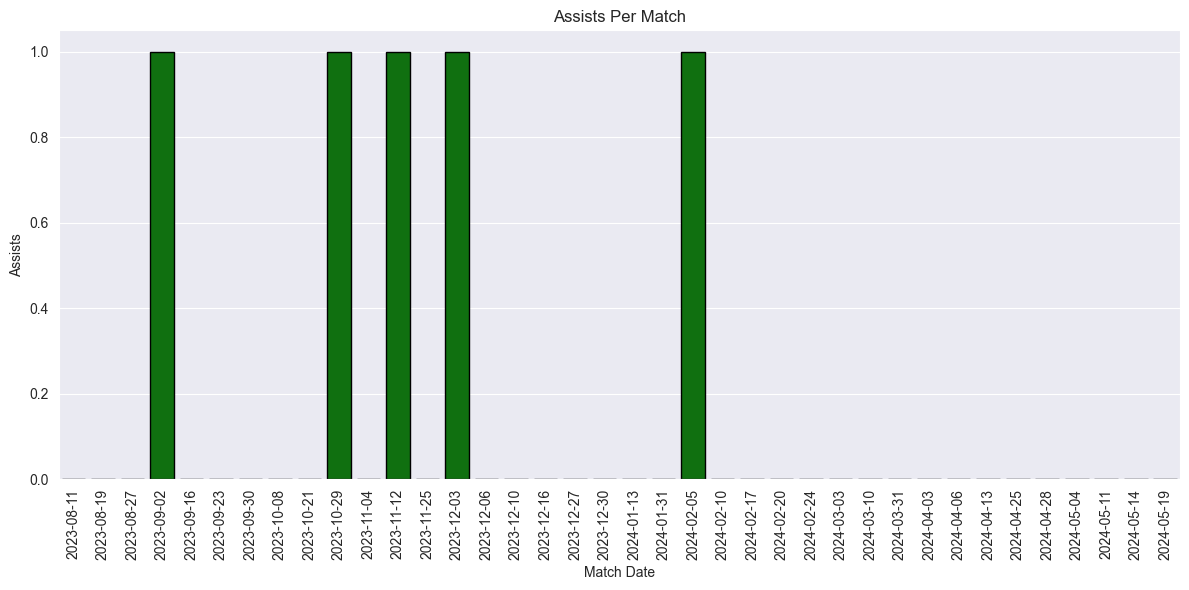

In [6]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Date', y='Ast', color='green', edgecolor='black')
plt.xticks(rotation=90)
plt.title('Assists Per Match')
plt.xlabel('Match Date')
plt.ylabel('Assists')
plt.tight_layout()
plt.show()


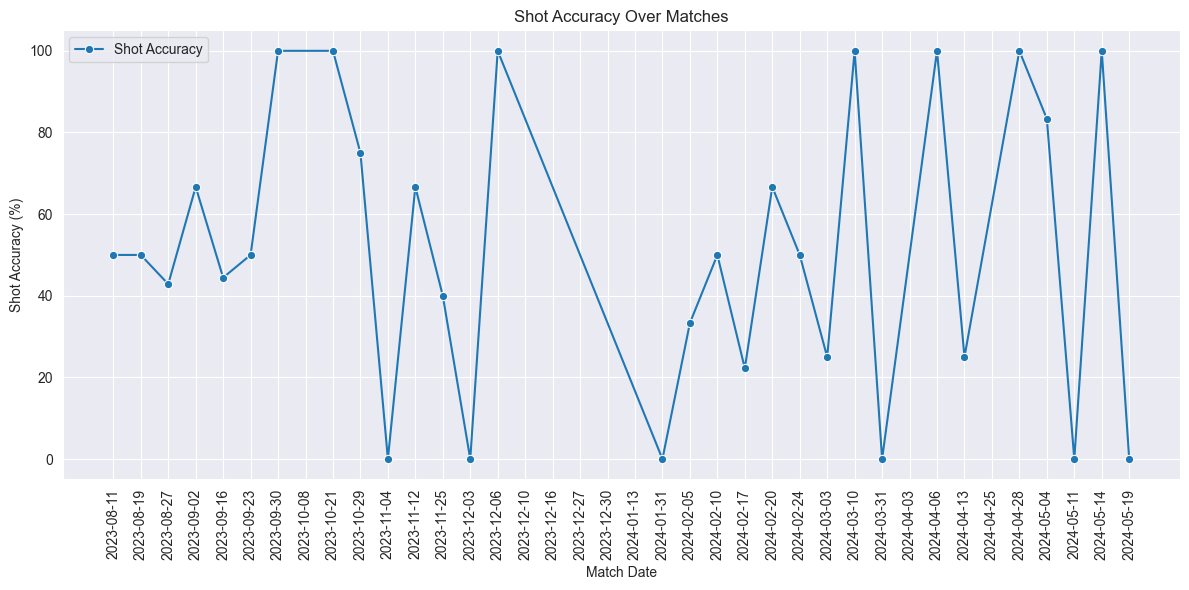

In [8]:
df['ShotAccuracy'] = (df['SoT'] / df['Sh']) * 100
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='ShotAccuracy', marker='o', label='Shot Accuracy')
plt.xticks(rotation=90)
plt.title('Shot Accuracy Over Matches')
plt.xlabel('Match Date')
plt.ylabel('Shot Accuracy (%)')
plt.tight_layout()
plt.show()


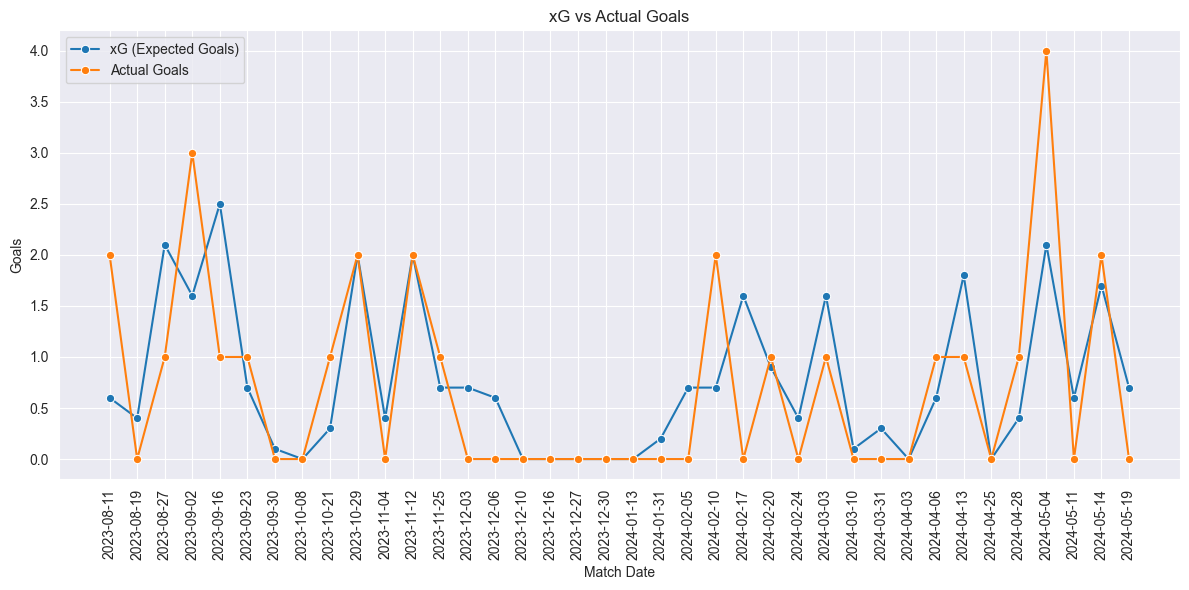

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Player_xG', label='xG (Expected Goals)', marker='o')
sns.lineplot(data=df, x='Date', y='Gls', label='Actual Goals', marker='o')
plt.xticks(rotation=90)
plt.title('xG vs Actual Goals')
plt.xlabel('Match Date')
plt.ylabel('Goals')
plt.legend()
plt.tight_layout()
plt.show()


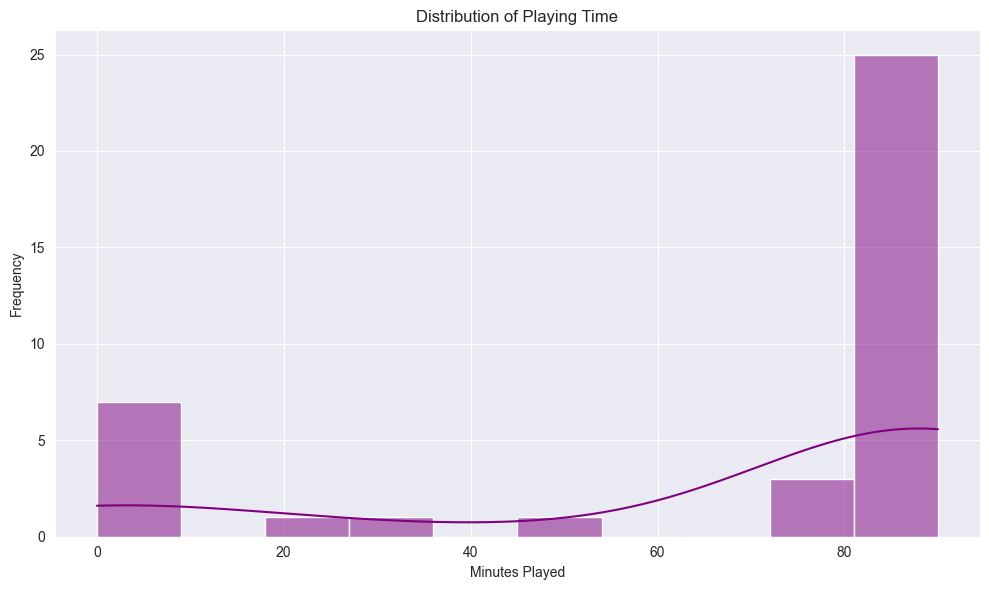

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Min', bins=10, kde=True, color='purple')
plt.title('Distribution of Playing Time')
plt.xlabel('Minutes Played')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


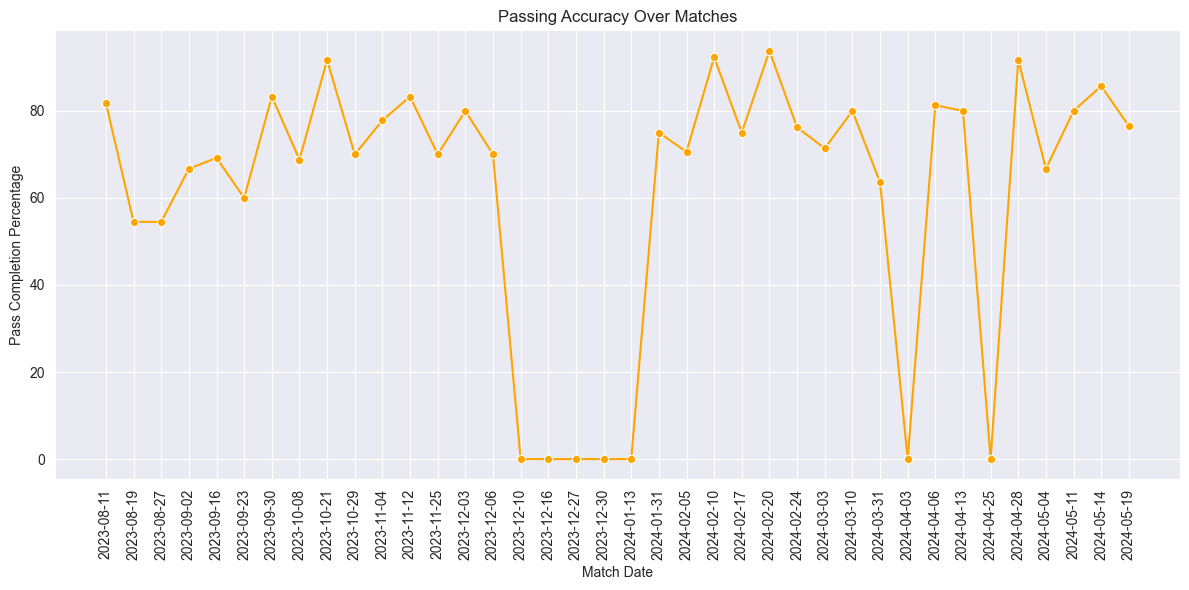

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='PassCmp%', marker='o', color='orange')
plt.xticks(rotation=90)
plt.title('Passing Accuracy Over Matches')
plt.xlabel('Match Date')
plt.ylabel('Pass Completion Percentage')
plt.tight_layout()
plt.show()


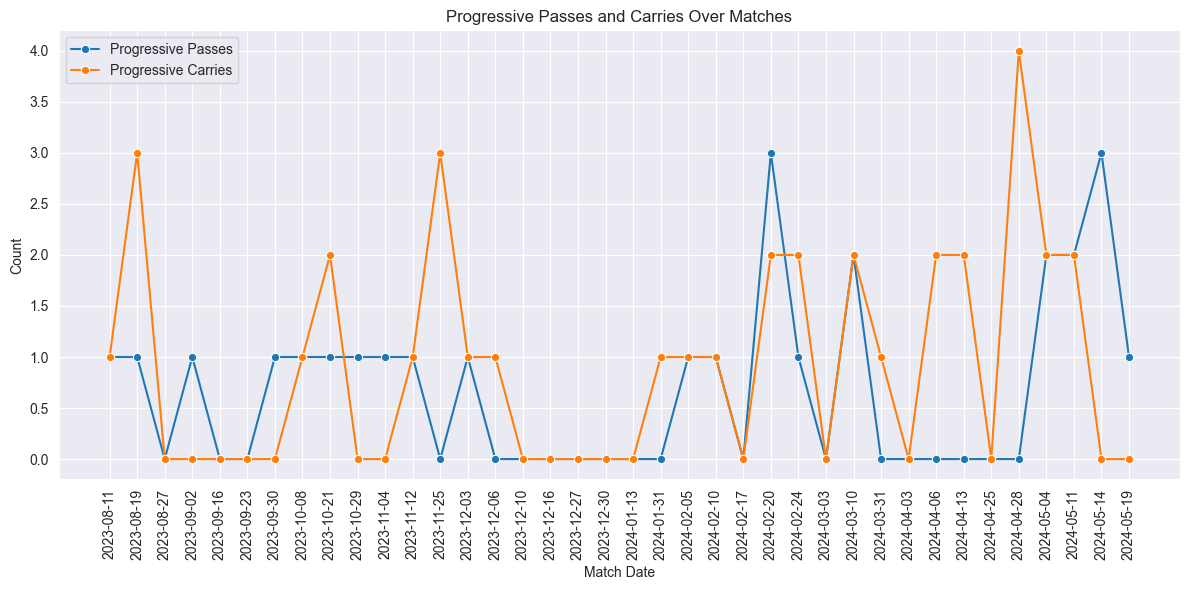

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='PrgPass', label='Progressive Passes', marker='o')
sns.lineplot(data=df, x='Date', y='PrgCarries', label='Progressive Carries', marker='o')
plt.xticks(rotation=90)
plt.title('Progressive Passes and Carries Over Matches')
plt.xlabel('Match Date')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


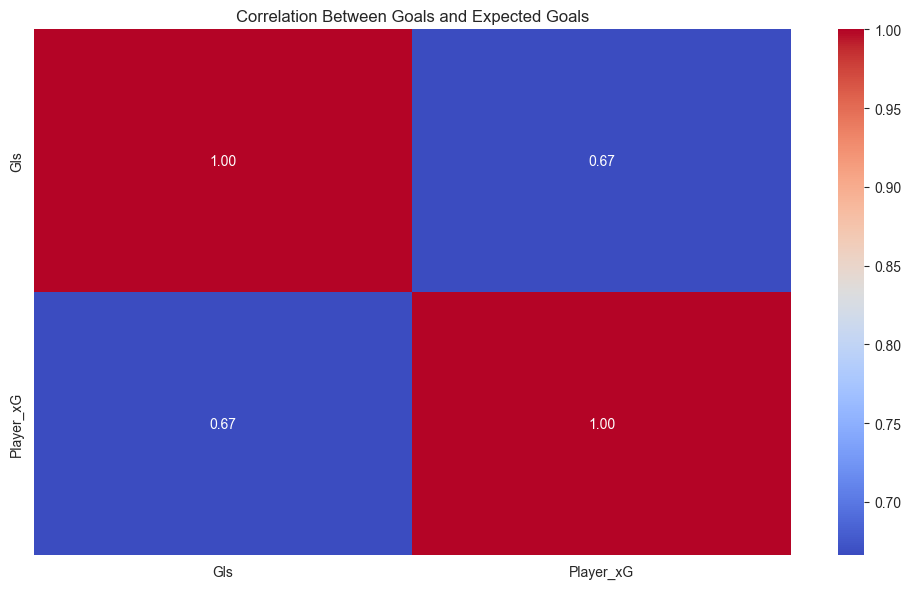

In [13]:
plt.figure(figsize=(10, 6))
correlation = df[['Gls', 'Player_xG']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Goals and Expected Goals')
plt.tight_layout()
plt.show()


C:\Users\khadk\AppData\Local\Temp\ipykernel_40332\778735236.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Date', y='MatchInvolvement', palette='viridis', edgecolor='black')


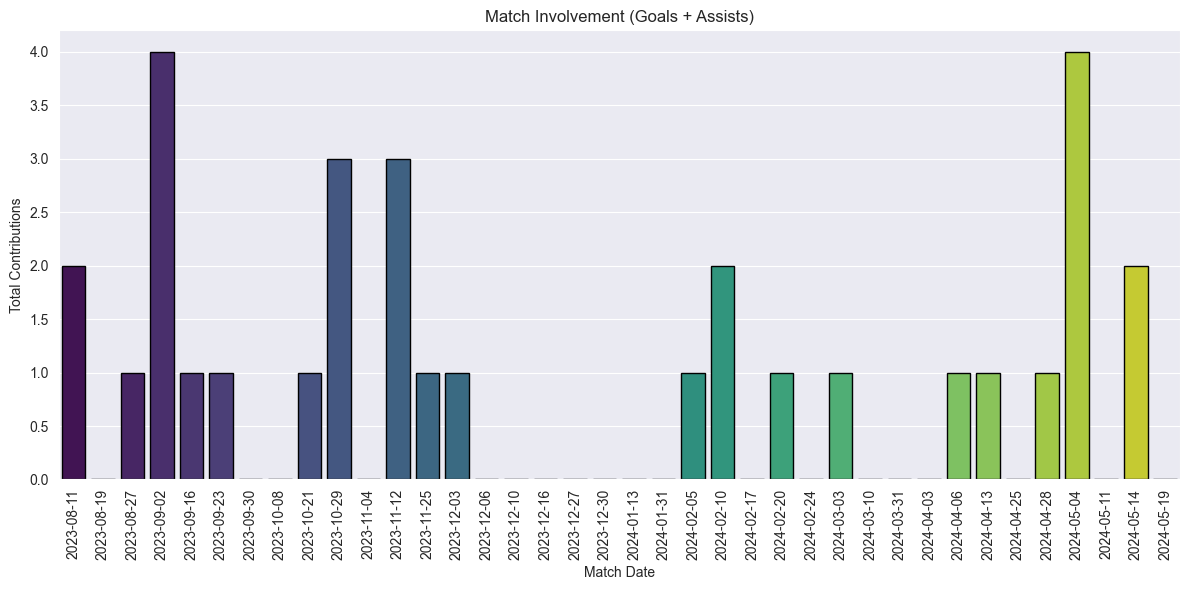

In [14]:
df['MatchInvolvement'] = df['Gls'] + df['Ast']
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Date', y='MatchInvolvement', palette='viridis', edgecolor='black')
plt.xticks(rotation=90)
plt.title('Match Involvement (Goals + Assists)')
plt.xlabel('Match Date')
plt.ylabel('Total Contributions')
plt.tight_layout()
plt.show()


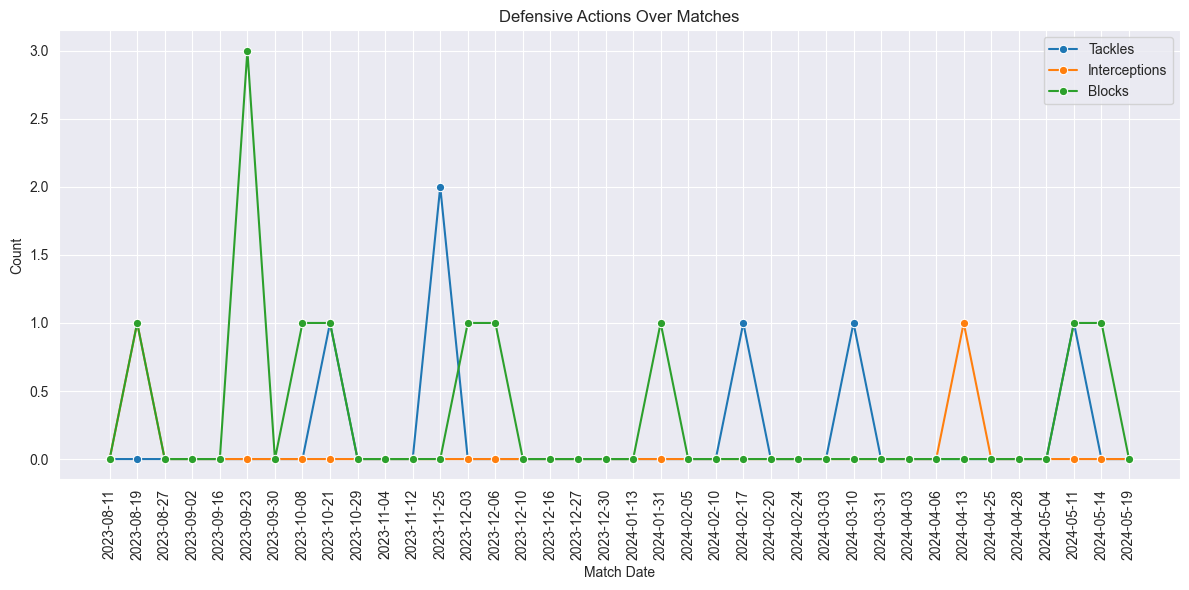

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Tkl', label='Tackles', marker='o')
sns.lineplot(data=df, x='Date', y='Int', label='Interceptions', marker='o')
sns.lineplot(data=df, x='Date', y='Blocks', label='Blocks', marker='o')
plt.xticks(rotation=90)
plt.title('Defensive Actions Over Matches')
plt.xlabel('Match Date')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


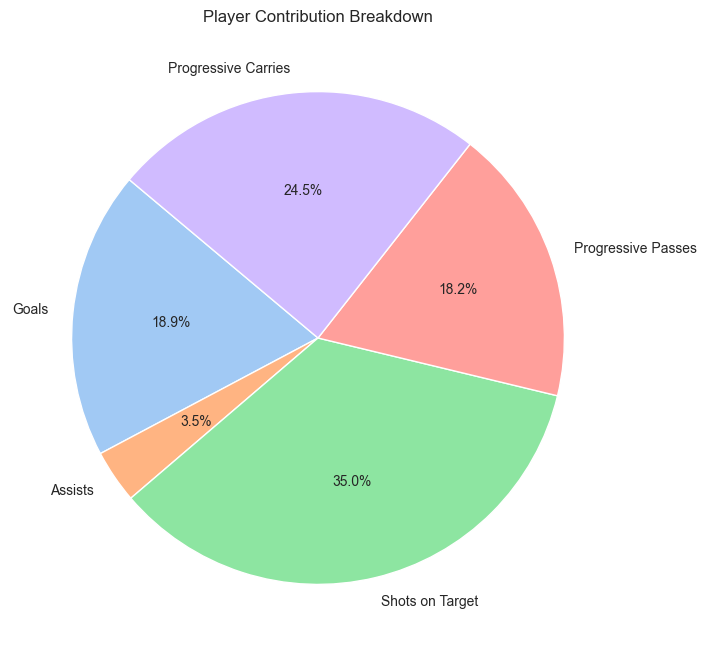

In [16]:
contribution_data = {
    'Goals': df['Gls'].sum(),
    'Assists': df['Ast'].sum(),
    'Shots on Target': df['SoT'].sum(),
    'Progressive Passes': df['PrgPass'].sum(),
    'Progressive Carries': df['PrgCarries'].sum()
}

plt.figure(figsize=(8, 8))
plt.pie(
    contribution_data.values(),
    labels=contribution_data.keys(),
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)
plt.title('Player Contribution Breakdown')
plt.show()


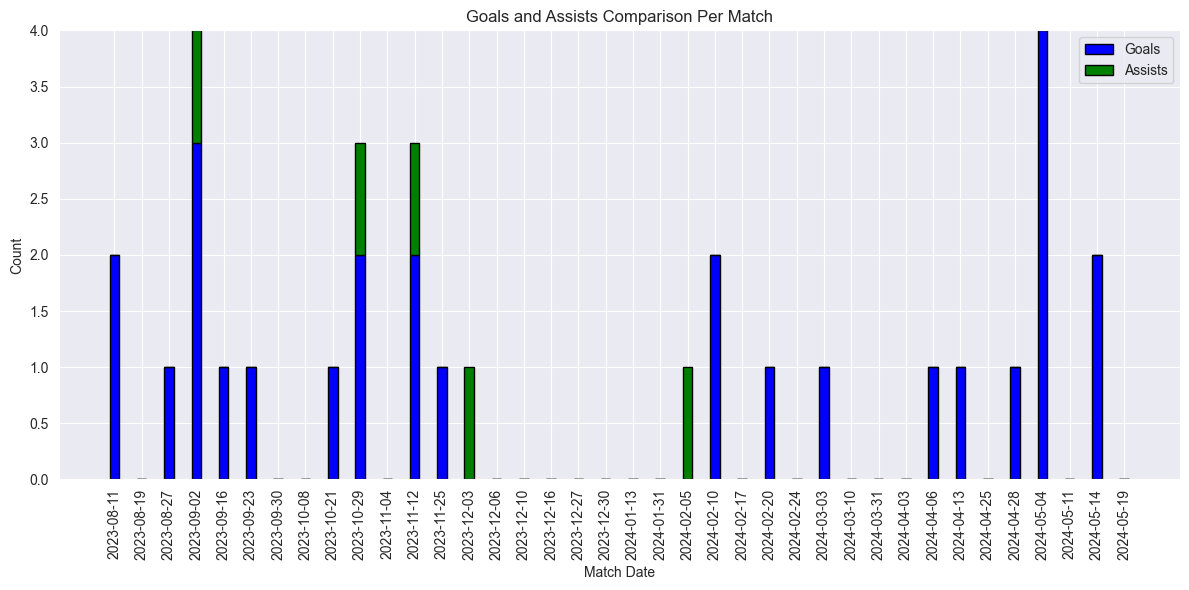

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Player_xG', y='Gls', hue='Date', palette='viridis', s=100)
plt.title('Expected Goals (xG) vs Actual Goals')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Actual Goals')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


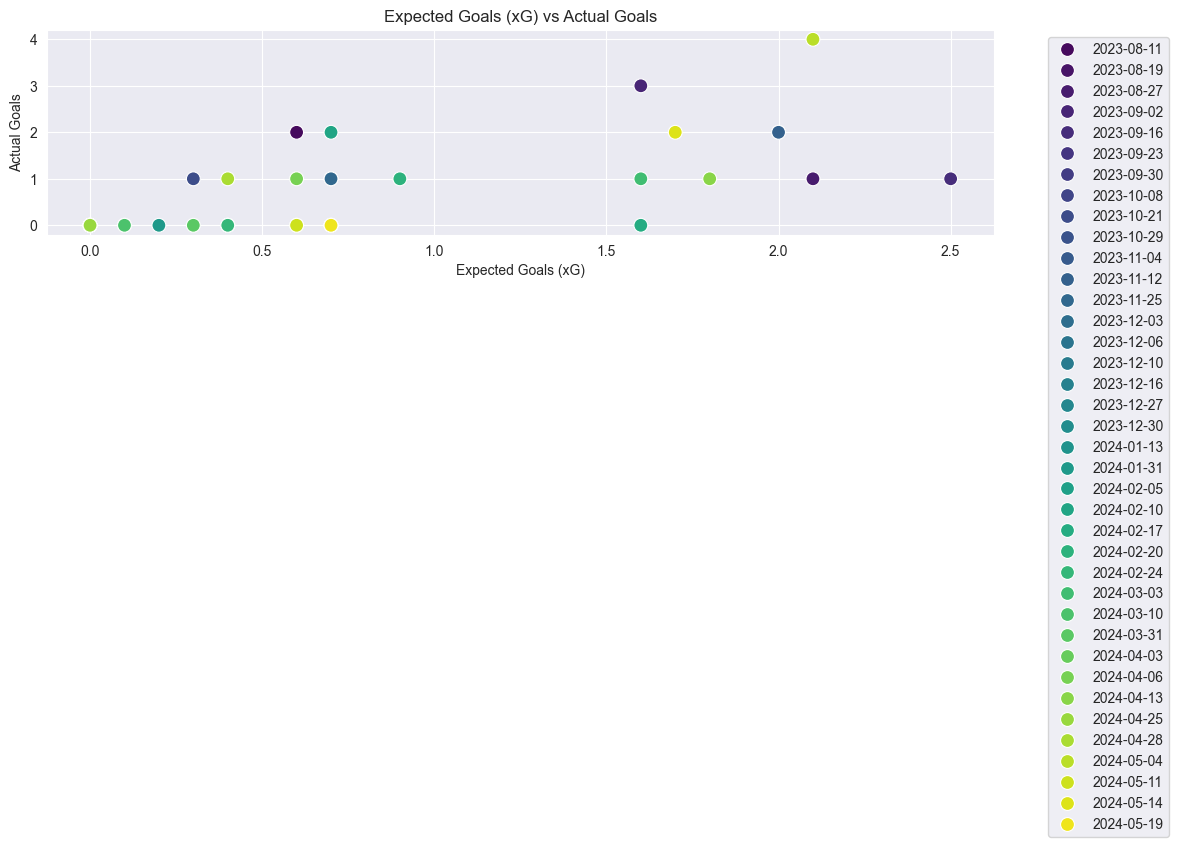

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Player_xG', y='Gls', hue='Date', palette='viridis', s=100)
plt.title('Expected Goals (xG) vs Actual Goals')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Actual Goals')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


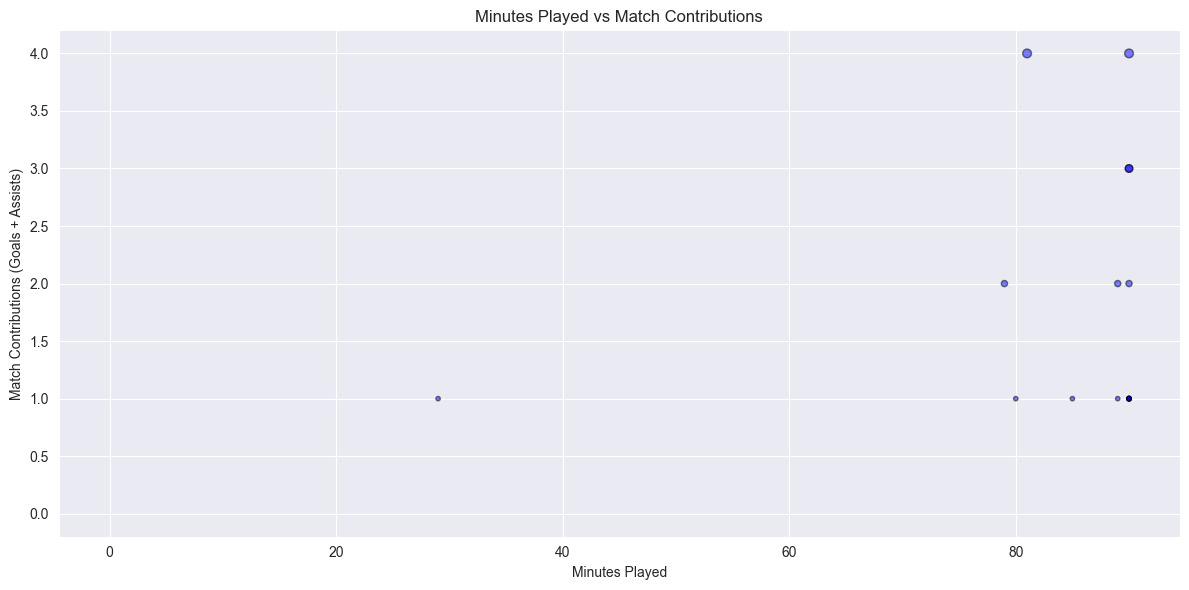

In [19]:
plt.figure(figsize=(12, 6))
plt.scatter(
    df['Min'], 
    df['MatchInvolvement'], 
    s=df['MatchInvolvement'] * 10, 
    alpha=0.5, 
    color='blue', 
    edgecolor='black'
)
plt.title('Minutes Played vs Match Contributions')
plt.xlabel('Minutes Played')
plt.ylabel('Match Contributions (Goals + Assists)')
plt.tight_layout()
plt.show()


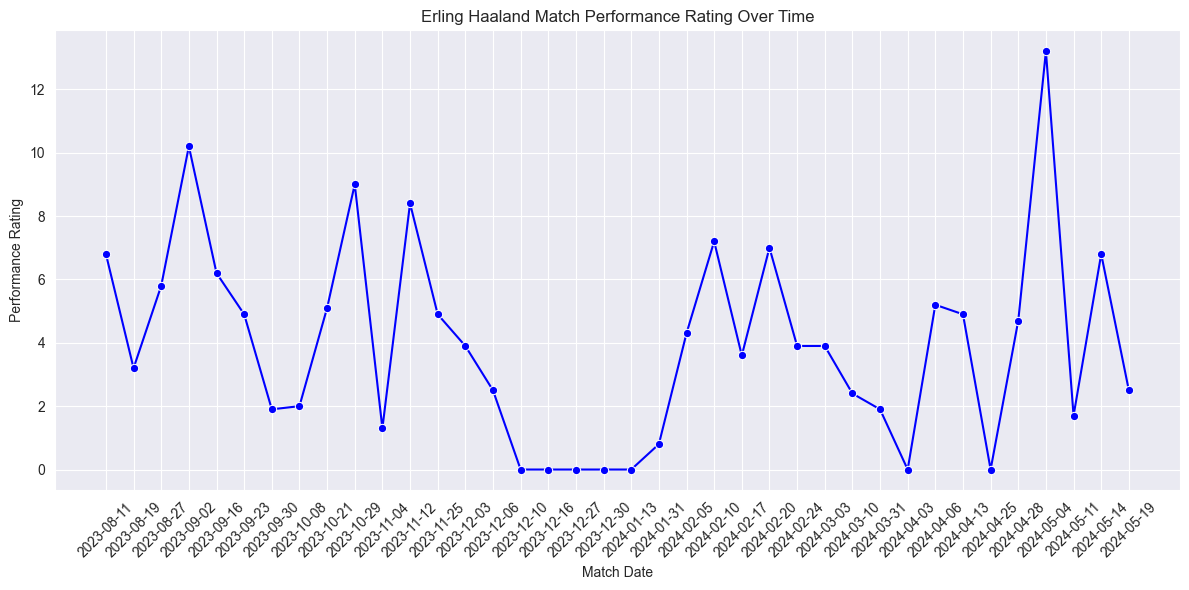

In [20]:
# Create a match performance rating
df['MPR'] = (df['Gls'] * 2) + (df['Ast'] * 1.5) + (df['SoT'] * 0.5) + (df['Touches'] * 0.1)

# Plot the match performance rating over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='MPR', marker='o', color='blue')
plt.title('Erling Haaland Match Performance Rating Over Time')
plt.xlabel('Match Date')
plt.ylabel('Performance Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

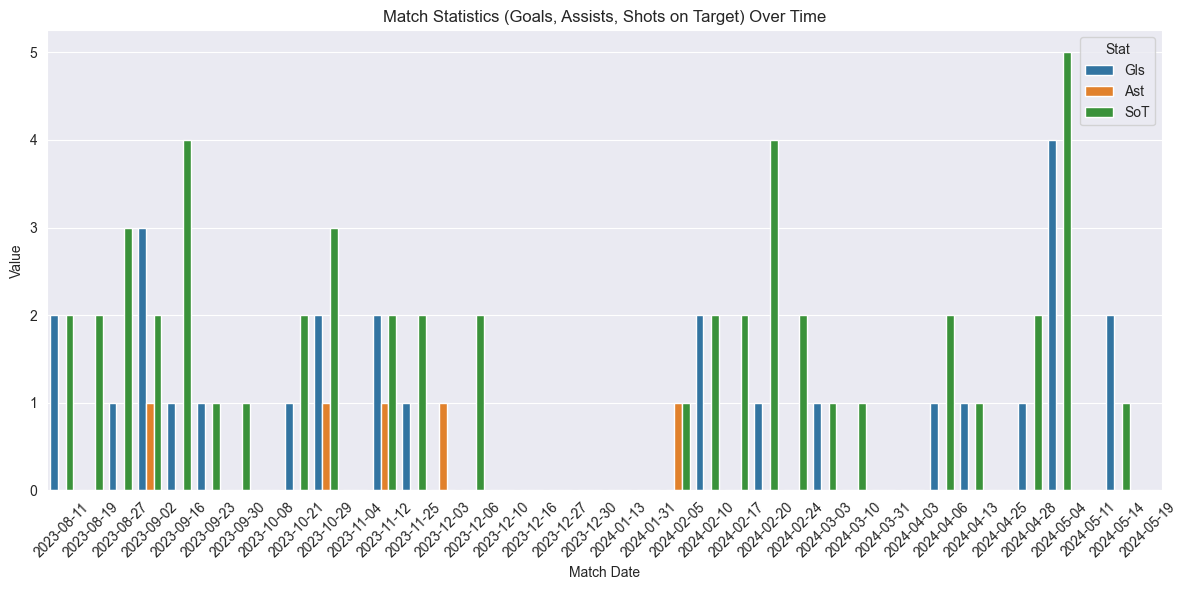

In [21]:
# Bar plot of goals, assists, and shots on target in each match
df_melted = df[['Date', 'Gls', 'Ast', 'SoT']].melt(id_vars=['Date'], value_vars=['Gls', 'Ast', 'SoT'], var_name='Stat', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Date', y='Value', hue='Stat', dodge=True)
plt.title('Match Statistics (Goals, Assists, Shots on Target) Over Time')
plt.xlabel('Match Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()